# Small Introduction to Feature Extraction on Images

## Do our imports
For this notebook we will use numpy, matplotlib, and scikit-image (imported as skimage)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature

## Load data and get a single image as an example
Here we load in the training data, and the fine and coarse training labels.

In [2]:
images = np.load('Datasets/trnImage.npy')
label_fine = np.load('Datasets/trnLabel_fine.npy')
label_coarse = np.load('Datasets/trnLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Images Fine Labels Shape: {label_fine.shape}')
print(f'Images Coarse Labels Shape: {label_coarse.shape}')
image_index = 2 # pick a specific image
image = images[:, :, :, image_index]

Images Shape: (32, 32, 3, 50000)
Images Fine Labels Shape: (50000,)
Images Coarse Labels Shape: (50000,)


## Hand-crafted Feature Extractor 
The following function extracts features from a single image. It returns both the feature vector, and an image that can be plotted to show what the features represent. 

The feature being extracted is the _Histogram of Oriented Gradients_. For more detail on this feature you can visit https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

The feature vector is what you might use to train a model, it is the measurements observed (similar to the 13 dimensions of the Wine data, or the 4 dimensions of the Fisher Iris). The returned image is only useful to get a sense of what the features might look like on the original image, you don't need them and in fact they can be slow to compute.

You may want to use such a feature extractor to obtain features to evaluate your experiements on. You may also want to explore what arguments to the $hog()$ function do, and how they may be tweaked. There are many feature extractors that you can investigate, and some models can even learn on the original feature space of the image (pixel RGB value). 

Note that this may take a long time to execute for the whole dataset. You may want to write your matrix of extracted features to disk as needed with $np.save()$. Tweaking the parameters to the $hog()$ method can also speed up the computation. 

In [3]:
# Extract features from a single image
hog_feature, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)

print(f'The extracted feature vector is of length {hog_feature.shape} per sample')

The extracted feature vector is of length (15876,) per sample


## Visualise the HoG features
This is purely for your benefit, so that we can see roughly what the output from the $hog()$ function is actually doing. 

Notice that the feature extractor is providing a representation that gives an indication of the direction and intensity of the gradients within localised areas of the image.

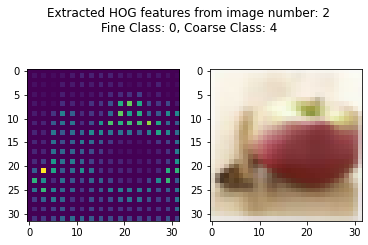

In [4]:
plt.figure()
plt.subplot(121)
plt.imshow(hog_image)
plt.subplot(122)
plt.imshow(image)
plt.suptitle(f'Extracted HOG features from image number: {image_index}\nFine Class: {label_fine[image_index]}, Coarse Class: {label_coarse[image_index]}')
plt.show(block=False)

## Using the features
If you remember back to the labs, we were usually using data in a matrix $X$, formatted in the shape ${S}\times{}{F}$, where ${S}$ was the number of individual samples (or data points), and ${F}$ was the number of feature dimensions for each sample.

Therefore, for most of the methods we have covered, we can extract features for each sample $\mathbf{x_i}$, which should be a vector of length $F$, and then stack them into our $S\times{}F$ matrix to use in our experiments. 

Some approaches may work on slightly different shaped input, such as neural networks and convolutional neural networks. As per Lab Sheet 4, Convolutional layers usually expect an input of shape $S\times{}H\times{}W\times{}C$; or *samples* $S$ which are of shape *height* $H$, *width* $W$ and *channel* $C$. Dense (Fully Connected) layers took in input of shape $S\times{}C$

## The Dataset
A description of the Cifar100 dataset can be found online at https://www.cs.toronto.edu/~kriz/cifar.html. This includes some baseline results and descriptions of the classes.